In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from tqdm import tqdm

%matplotlib inline

df = pd.read_csv('datasets/avy_X-y.csv', index_col='Unnamed: 0')

In [2]:
print(df.columns)
print(len(df))
df.count()

Index(['Temperature_m', 'Relative_Humidity_m', 'Temperature_tl',
       'Relative_Humidity_tl', 'Wind_Speed_Average_tl',
       'Wind_Speed_Maximum_tl', 'Wind_Direction_(deg.)_tl', 'precip', 'depth',
       'pressure', 'above', 'below', 'discussion', 'near', 'storm_slabs',
       'wet_slabs', 'persistent', 'wind_slab', 'loose_wet', 'glide',
       'cornices', 'loose_dry'],
      dtype='object')
28096


Temperature_m               28096
Relative_Humidity_m         28096
Temperature_tl              28096
Relative_Humidity_tl        28096
Wind_Speed_Average_tl       28096
Wind_Speed_Maximum_tl       28096
Wind_Direction_(deg.)_tl    28096
precip                      28096
depth                       28096
pressure                    28096
above                        9911
below                        9911
discussion                   9911
near                         9911
storm_slabs                  9911
wet_slabs                    9911
persistent                   9911
wind_slab                    9911
loose_wet                    9911
glide                        9911
cornices                     9911
loose_dry                    9911
dtype: int64

In [3]:
df.describe()

,Temperature_m,Relative_Humidity_m,Temperature_tl,Relative_Humidity_tl,Wind_Speed_Average_tl,Wind_Speed_Maximum_tl,Wind_Direction_(deg.)_tl,precip,depth,pressure,...,below,near,storm_slabs,wet_slabs,persistent,wind_slab,loose_wet,glide,cornices,loose_dry
count,28096.000000,28096.000000,28096.000000,28096.000000,28096.000000,28096.000000,28096.000000,28096.000000,28096.000000,28096.000000,...,9911.000000,9911.000000,9911.000000,9911.000000,9911.00000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000
mean,41.340654,69.038744,40.459413,71.808071,5.993168,13.217519,232.426810,0.010876,35.254139,1016.176392,...,1.932926,2.332011,0.453088,0.031480,0.05212,0.802341,0.525207,0.008532,0.163998,0.036374
std,14.186632,24.548847,14.506174,28.415366,4.858733,8.173173,106.077977,0.034138,42.249978,6.085565,...,0.698447,0.704180,0.451705,0.152445,0.19421,0.378235,0.465231,0.085119,0.354426,0.171454
min,3.229000,4.673000,5.743000,4.038000,-0.036000,0.000000,0.005000,0.000000,0.000000,990.000000,...,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.880000,48.297500,29.200000,46.807500,1.494000,7.160000,106.100000,0.000000,2.905000,1013.212000,...,1.291667,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.380000,76.020000,37.900000,82.500000,5.574000,12.960000,286.700000,0.000000,11.260000,1017.278000,...,2.000000,2.041667,0.333333,0.000000,0.00000,1.000000,0.625000,0.000000,0.000000,0.000000
75%,50.840000,91.900000,51.082500,99.400000,9.330000,18.380000,310.500000,0.000000,69.300000,1020.180000,...,2.125000,3.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000
max,86.800000,100.000000,85.000000,100.000000,41.900000,72.800000,360.000000,0.740000,143.700000,1034.949000,...,5.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.index

Index(['2014-09-23 09:00:00', '2014-09-23 10:00:00', '2014-09-23 11:00:00',
       '2014-09-23 12:00:00', '2014-09-23 13:00:00', '2014-09-23 14:00:00',
       '2014-09-23 15:00:00', '2014-09-23 16:00:00', '2014-09-23 17:00:00',
       '2014-09-23 18:00:00',
       ...
       '2017-12-08 03:00:00', '2017-12-08 04:00:00', '2017-12-08 05:00:00',
       '2017-12-08 06:00:00', '2017-12-08 07:00:00', '2017-12-08 08:00:00',
       '2017-12-08 09:00:00', '2017-12-08 10:00:00', '2017-12-08 11:00:00',
       '2017-12-08 12:00:00'],
      dtype='object', length=28096)

### Prediction 1:
# Storm Slab

### Storm slab is formed during storms and tends to stabilize very quickly (~3 days after snowfall typical; definitely should resolve within a week)

y = NWAC's forecast of storm slab: 0 or 1 at time T
X = weather conditions, 5 days prior to T 
_possible revision to model: 5 days before and up to 24 hours after (because NWAC may predict storm slab as a hazard when a storm is coming in in the afternoon) - see if this is relevant_

In [5]:
y_all = df.storm_slabs   # np.npdarray 

In [7]:
# some relevant methods for manipluating y

print(y_all.values.shape)
print(y_all.count())
print(y_all.iloc[:5].isna())
print('...')
print(y_all.iloc[-5:].isna())
print()
y_ok = y_all[~y_all.isna()]
print('y_ok.__len__() =', len(y_ok))

(28096,)
9911
2014-09-23 09:00:00    True
2014-09-23 10:00:00    True
2014-09-23 11:00:00    True
2014-09-23 12:00:00    True
2014-09-23 13:00:00    True
Name: storm_slabs, dtype: bool
...
2017-12-08 08:00:00    False
2017-12-08 09:00:00    False
2017-12-08 10:00:00    False
2017-12-08 11:00:00    False
2017-12-08 12:00:00    False
Name: storm_slabs, dtype: bool

y_ok.__len__() = 9911


In [8]:
df.precip = df.precip.apply(lambda x: x*100)   # bring precip up to same scale approximately

In [19]:
cols = ['Temperature_m', 'Wind_Speed_Average_tl', 'precip', 'Relative_Humidity_m'] 
# cols to use

data = df[cols]
       
# DNU   'depth','Temperature_tl', 'Wind_Speed_Maximum_tl',
       #'above', 'below', 'near', 'storm_slabs', 'wet_slabs', 'Relative_Humidity_m',
       #'persistent', 'wind_slab', 'loose_wet', 'glide', 'cornices',
       #'loose_dry', 'Relative_Humidity_tl',  'Wind_Direction_(deg.)_tl',]

In [20]:
data.corr()
# wind_speed average and maximum are 94% correlated so drop maximum.
# temperature tl and m are also eqivalent

,Temperature_m,Wind_Speed_Average_tl,precip,Relative_Humidity_m
Temperature_m,1.000000,-0.223283,-0.174584,-0.708040
Wind_Speed_Average_tl,-0.223283,1.000000,0.251907,0.176858
precip,-0.174584,0.251907,1.000000,0.332055
Relative_Humidity_m,-0.708040,0.176858,0.332055,1.000000


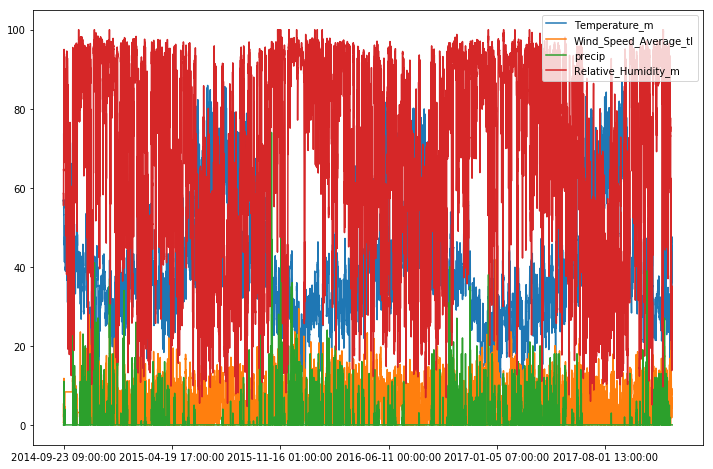

In [21]:
data.plot(figsize=(12, 8))

In [22]:
print(data.values.shape)
print()
print(data.count())
# ok so: y is 9910 samples; these samples correspond to timestamps from a subset of the data
print()
print(len(data[~y_all.isna()]), '= number of data corresponding to y_ok')
print()
print(data.loc[y_ok.index[0]])

(28096, 4)

Temperature_m            28096
Wind_Speed_Average_tl    28096
precip                   28096
Relative_Humidity_m      28096
dtype: int64

9911 = number of data corresponding to y_ok

Temperature_m            32.68
Wind_Speed_Average_tl    10.24
precip                   17.00
Relative_Humidity_m      96.70
Name: 2014-12-20 12:00:00, dtype: float64


In [23]:
# find i | x[i] matches index of y[j]
# only have to run it once!

dicty = {}    # map from .iloc index of y: corresponding .iloc index of data

lower_limit = 0
for i in range(len(y_ok)):
    for j in range(lower_limit, len(data)):
        if data.index[j] == y_ok.index[i]:
            dicty[i] = j
            lower_limit = j
            break

In [24]:
dicty[0]

2115

In [25]:
data.values.shape

(28096, 4)

In [26]:
fl = 6  # fl = forward looking - ie. how far forward (hours)
days = 1

X_multiseries = np.empty((len(y_ok) - fl, 24*days, len(data.columns)))   
# 9910 - 30 samples because last day goes into future; days of weather info * 24hours/day  x  columns

for i in range(len(y_ok) - fl):
    X_multiseries[i] = data.values[dicty[i] - 24*(days) + fl: dicty[i] + fl]
    
# X is now a dataset with 'days' days worth of weather for each y

y = y_ok[:-fl]
X_multiseries.shape

y.shape

(9905,)

In [27]:
# look at some X s

def view_x(i, X=X_multiseries, labels=y.values):
    # view i-th sample of multiseries data
    print(' \n\n#####')
    x = X[i]
    for s in range(x.shape[-1]):  # for series index:
        plt.plot(range(len(x[:, s])), x[:, s], label=cols[s])
    plt.legend(loc=2)
    plt.show()
    print(labels[i])

 

#####


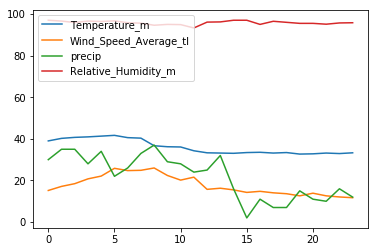

1.0
 

#####


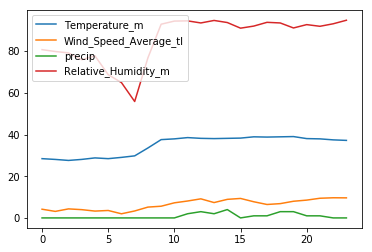

0.0


In [28]:
view_x(24)  # danger of storm slab

view_x(72)  # no danger

One idea:

# Replace X with DCT transform of X

### dimensionality reduction by eliminating HF noise

For dataset, use DCT of time series points; this is the same information but easy to compress by deleting HF components. Most of the info is stored in the 0th component (mean) and the 1st component (trend left-right).




In [29]:
# build DCT of time series

X_transform = X_multiseries.copy()   # copy old dataset; transform will be same shape.

for time_series in tqdm(range(X_multiseries.shape[-1])):
    X_transform[:, :, time_series] = dct(X_multiseries[:, :, time_series])
    
# remove HF data... keep ? transform components
transform_components = 4

print(X_transform.shape)
X_transform = X_transform[:, :transform_components, :]  # ?
print(X_transform.shape)

100%|██████████| 4/4 [00:00<00:00, 246.63it/s]

(9905, 24, 4)
(9905, 4, 4)


In [30]:
# test - rebuild some samples with DCT III to confirm that this is real

# X_transformed_back = np.zeros(X_multiseries.shape)  # copy shape of old dataset; transform will be same shape.
# OR
X_transformed_back = np.zeros(X_transform.shape)  # copy shape of transform; remap times to this scale

X_transformed_back[:, :transform_components, :] = X_transform

for time_series in tqdm(range(X_multiseries.shape[-1])):
    X_transformed_back[:, :, time_series] = dct(X_transformed_back[:, :, time_series], type=3)

100%|██████████| 4/4 [00:00<00:00, 1510.10it/s]


[[  1.52018000e+03   3.78710000e+02   6.00000000e+00   3.49574000e+03]
 [ -1.46960358e+01   1.05658974e+02  -1.99571785e+00  -3.00089948e+02]
 [  4.93650799e+01   4.03276441e+01   5.94866917e+00  -2.09848460e+02]
 [ -9.44748455e+01  -3.46084507e+01  -1.96157056e+00  -2.57984933e+02]]
 

#####


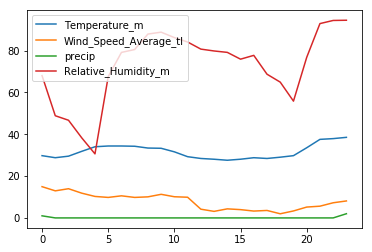

0.5
 

#####


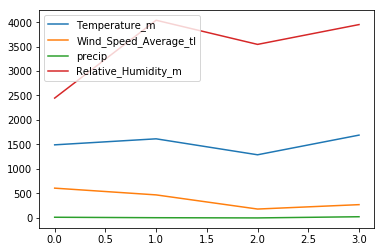

0.5


In [31]:
# looks good although scales are weird...:
print(X_transform[60])   # 4 series; transform_components transform coefs per series
view_x(60)
view_x(60, X=X_transformed_back)

# Train a model

### Using either the transform coefs themselves,
### or the re-scaled X_transformed_back

In [35]:
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.preprocessing import scale

# make RF for each time series
X_transform[:, :, ]
multi_rf = {}
for i in range(len(data.columns)):
    multi_rf[i] = RF(n_estimators=10, n_jobs=-1, max_features=3, max_depth=5)

In [36]:
# standardization using sklearn.preprocessing; train/test split

X = np.empty(X_transformed_back.shape)
for s in range(len(cols)):
    X[:, :, s] = scale(X_transformed_back[:, :, s])

split = -2000
X_train = X[:split]
X_test = X[split:]

y_train = y[:split].values   # y is a DataFrame
y_test = y[split:].values

y_train.shape

(7905,)

In [37]:
# fit each RF to a series (X predict y_train: 0.0...1.0)
for s in tqdm(range(X_train.shape[-1])):
    multi_rf[s].fit(X_train[:, :, s], y_train)

100%|██████████| 4/4 [00:00<00:00,  8.74it/s]


In [38]:
# generate features for training set to train metaclassifier
X_train_meta = np.empty((X_train.shape[0], X_train.shape[-1]))
for i in tqdm(range(X_train.shape[-1])):
    X_train_meta[:, i] = multi_rf[i].predict(X_train[:, :, i])

100%|██████████| 4/4 [00:00<00:00,  9.52it/s]


 

#####


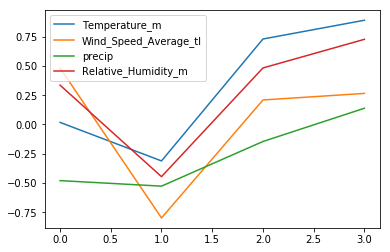

0.166666666667
 

#####


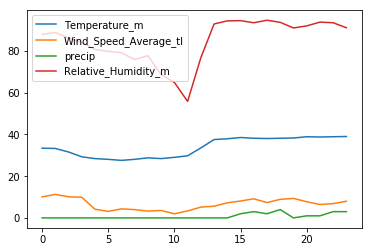

0.166666666667
[ 0.36812537  0.55843252  0.45059229  0.52893834]
 

#####


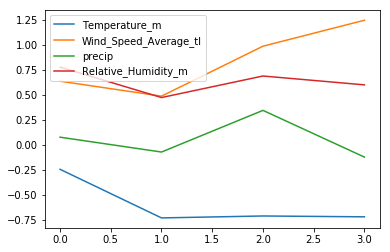

0.5
 

#####


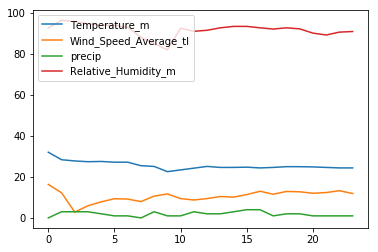

0.5
[ 0.68925499  0.70688741  0.7851436   0.69294625]
 

#####


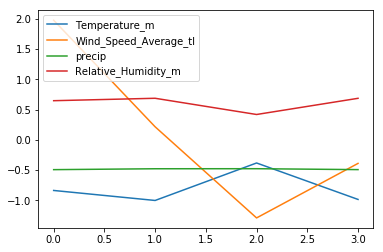

0.166666666667
 

#####


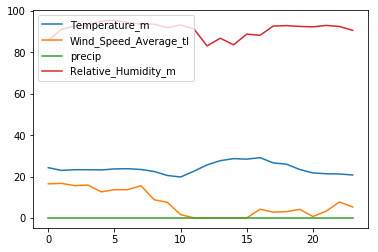

0.166666666667
[ 0.68925499  0.64155978  0.15145391  0.49862891]
 

#####


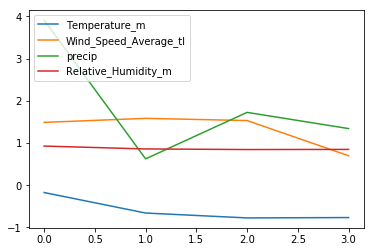

1.0
 

#####


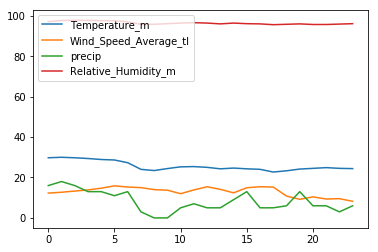

1.0
[ 0.68925499  0.69005995  0.93167515  0.93680331]
 

#####


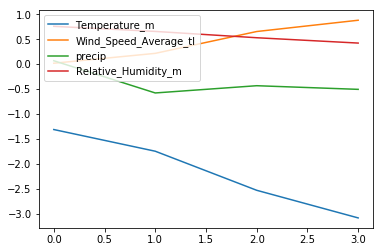

0.5
 

#####


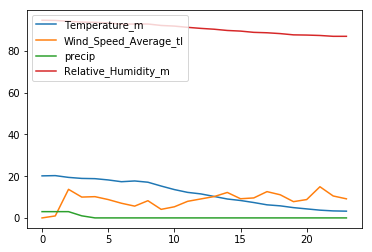

0.5
[ 0.4580225   0.66660091  0.61158003  0.66398592]


In [39]:
for t in range(5):
    time = 68 + t * 40
    view_x(time, X_train)
    view_x(time)
    print(X_train_meta[time])

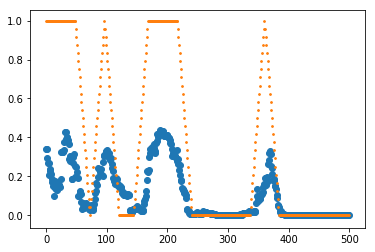

In [40]:
plt.scatter(range(500), X_train_meta[:500].prod(axis=1))
plt.scatter(range(500), y_train[:500], alpha=1, s=3)

In [41]:
X_test_meta = np.empty((X_test.shape[0], X_test.shape[-1]))
for i in tqdm(range(X_test.shape[-1])):
    X_test_meta[:, i] = multi_rf[i].predict(X_test[:, :, i])

X_test_meta.shape

100%|██████████| 4/4 [00:00<00:00,  9.65it/s]


(2000, 4)

In [42]:
zp = (zip(cols, X_test_meta.mean(axis=0)))
for item in zp:
    print(item)
y_test.mean()

('Temperature_m', 0.53682140978107862)
('Wind_Speed_Average_tl', 0.52827931947410012)
('precip', 0.55555128772219853)
('Relative_Humidity_m', 0.45550702979893182)


0.34557157097288677

In [43]:
cols
y_test_pred = X_test_meta.mean(axis=1)

correct = 0
for i in range(len(y_test)):
    if y_test[i] != np.round(y_test_pred[i]):
        # print(i, y_test.values[i], y_test_pred[i])
        pass
    else:
        correct += 1
        
print(correct, 'of', len(y_test))

872 of 2000


 

#####


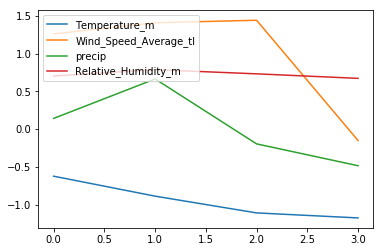

1.0
0.693145084837
[ 0.68925499  0.70389723  0.74540669  0.63402143]
 

#####


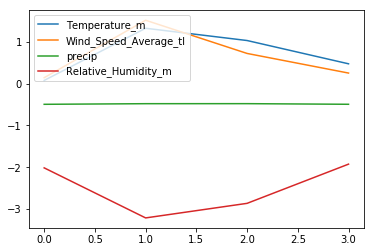

1.0
0.262284819071
[ 0.23559835  0.63399011  0.15145391  0.02809691]
 

#####


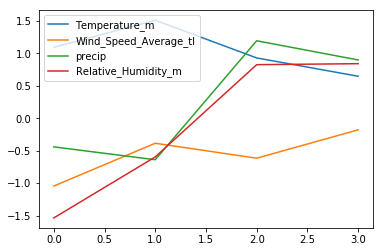

0.333333333333
0.44485632336
[ 0.2257432   0.34781774  0.6791387   0.52672566]


In [44]:
for t in range(3):
    time = t * 40
    view_x(time, X_test)  # no danger
    print(X_test_meta[time].mean())
    print(X_test_meta[time])

In [45]:
output_rf = RF(n_estimators=3)
output_rf.fit(X_train_meta, y_train)
preds = output_rf.predict(X_test_meta)

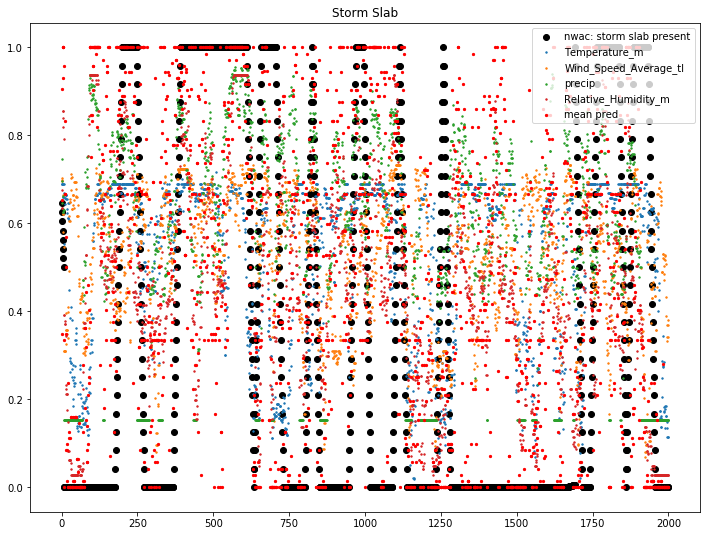

In [47]:
plt.figure(figsize=(12, 9))

plt.scatter(range(len(y_test)), y_test, c='k', label='nwac: storm slab present')

for s in range(X_test_meta.shape[-1]):
    plt.scatter(range(len(X_test_meta)), X_test_meta[:, s], s=2, label=cols[s])
# not very helpful, therefore:
    
# plt.scatter(range(len(X_test_meta)), X_test_meta.prod(axis=1) * 2, s=4, c='k', label='mean pred')
plt.scatter(range(len(X_test_meta)), preds, s=5, c='r', label='mean pred')

plt.title('Storm Slab')
plt.legend(loc=1)
    
plt.show()
# n_estimators = 5

In [ ]:
print('Mean Sq. Errors \n')
mse = {}
for s in range(len(cols)):
    mse[cols[s]] = sum((X_test_meta[:, s] - y_test) ** 2) / len(y_test)
    print(cols[s], ' - ', mse[cols[s]])


In [ ]:
for s in range(len(cols)):
    print(cols[s])
    print('train:', multi_rf[s].score(X_train[:, :, s], y_train))
    print('test:', multi_rf[s].score(X_test[:, :, s], y_test))
    
print('product', sum((X_test_meta.prod(axis=1) - y_test) ** 2) / len(y_test))
print('random forest', (sum(preds - y_test) ** 2) / len(y_test))